## __Pima Indian Diabetes Prediction__


The aim of this project to analyze the medical factors of a patient such as Glucose Level, Blood Pressure, Skin Thickness, Insulin Level and<br> many others to predict whether the patient has diabetes or not.

### About the Dataset

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to<br> diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several<br> constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21<br> years old of Pima Indian heritage.

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of<br> pregnancies the patient has had, their BMI, insulin level, age, and so on.

#### Data Dictionary

| Features | Description |
| --- | --- |
| Pregnancies | Number of times pregnant |
| Glucose | Plasma glucose concentration a 2 hours in an oral glucose tolerance test |
| BloodPressure | Diastolic blood pressure (mm Hg) |
| SkinThickness | Triceps skin fold thickness (mm) |
| Insulin | 2-Hour serum insulin (mu U/ml) |
| BMI | Body mass index (weight in kg/(height in m)^2) |
| DiabetesPedigreeFunction | Diabetes pedigree function |
| Age | Age (years) |
| Outcome | Class variable (0 or 1) |

In [219]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [221]:
#loading dataset
df = pd.read_csv("E:/diabetes1.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Data Preprocessing

In [501]:
#shape of the dataset
df.shape

(768, 9)

In [ ]:
Checking the unique values for each variable in the dataset

In [225]:
#checking for the unique values
variables = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
for i in variables:
 print(df[i].unique())

[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
[ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
[35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  8
 49 63 99]
[  0  94 168  88 543 846 175 230  83  96 235 

In the dataset the variables except Pregnancies and Outcome cannot have value as 0, because it is not possible to have 0 Glucose Level or to have 0 Blood Pressure. So, this will be counted as incorrect information

Checking the count of value 0 in the variables

In [227]:
#Checking the count of value 0 in the variables
variables=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age',]
for i in variables:
    c=0
    for x in (df[i]):
        if x==0:
         c = c+1
    print(i,c)

Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0


Now, I have count of incoorect values in the variables, I will be replacing these values



__Replacing the 0 value in the variables - Glucose, BloodPressure, SkinThickness, Insulin, BMI__

In [229]:
#replacing the missing values with the mean
variables=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in variables:
    df[i].replace(0,df[i].mean())

In [231]:
#checking to make sure the replacement
variables=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age',]
for i in variables:
    c=0
    for x in (df[i]):
        if x==0:
         c = c+1
    print(i,c)

Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0


Now, I have replace the incorrect values



__Checking for missing values__

In [233]:
#checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Descriptive Statistics

In [425]:
#checking descriptive Statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [237]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### __Exploratory Data Analysis__


In the exploratory data analysis, I will be looking at the distribution of the data, the correlation between the features, and the relationship<br> between the features and the target variable. I will start by looking at the distribution of the data, followed by relationship between the<br> target variable and independent variables.

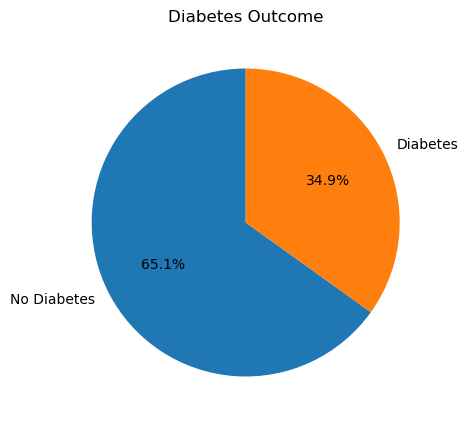

In [239]:
#Exploratory data analysis
plt.figure(figsize=(5,5))
plt.pie(df['Outcome'].value_counts(), labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', shadow=False, startangle=90)
plt.title('Diabetes Outcome')
plt.show()

### __AGE DISTRIBUTION AND DIABETES__

D:\anaconda\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\anaconda\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 22.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\anaconda\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 21.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


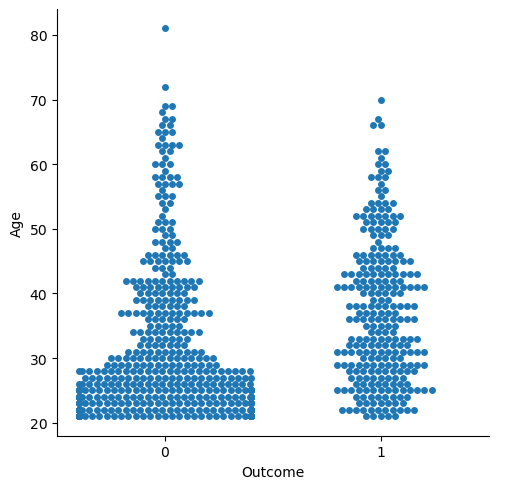

In [241]:
sns.catplot(x="Outcome", y="Age", kind="swarm", data = df)

From the graph, it is quite clear that majority of the patients are adult within the age group of 20-30 years. Patients in the age range 40-55<br> years are more prone to diabetes, as compared to other age groups. Since the number adults in the age group 20-30 years is more, the<br> number of patients with diabetes is also more as compared of other age groups.

### __PREGNANCIES AND DIABETES__

<Axes: xlabel='Outcome', ylabel='Pregnancies'>

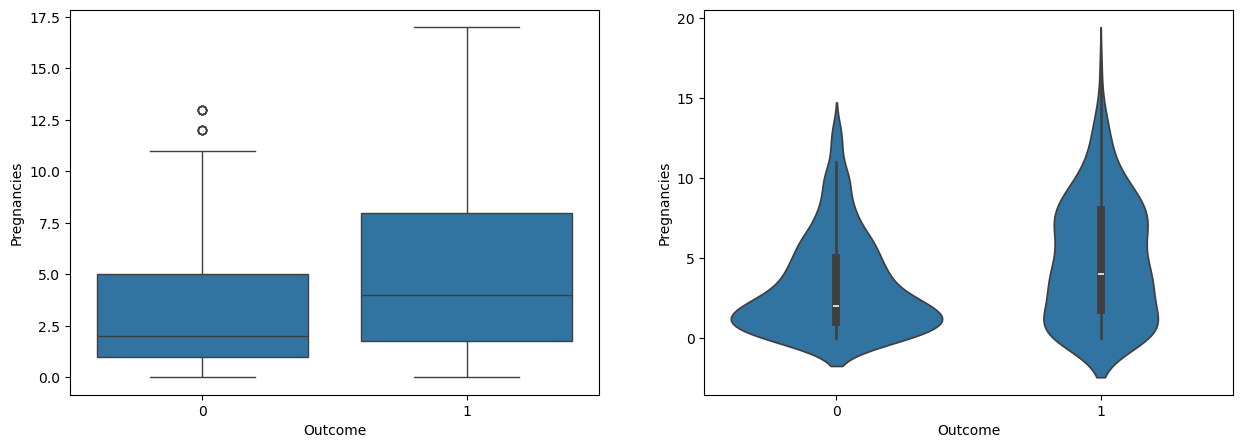

In [506]:
#Pregnancies and Diabetes
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Outcome',y='Pregnancies',data=df,ax=ax[0])
sns.violinplot(x='Outcome',y='Pregnancies',data=df,ax=ax[1])

Both boxplot and violinplot shows strange relation between the number of preganacies and diabetes. According to the graphs the<br> increased number of pregnancies highlights increased risk of diabetes.

### __GLUCOSE AND DIABETES__

Text(0.5, 1.0, 'Glucose vs Diabetes')

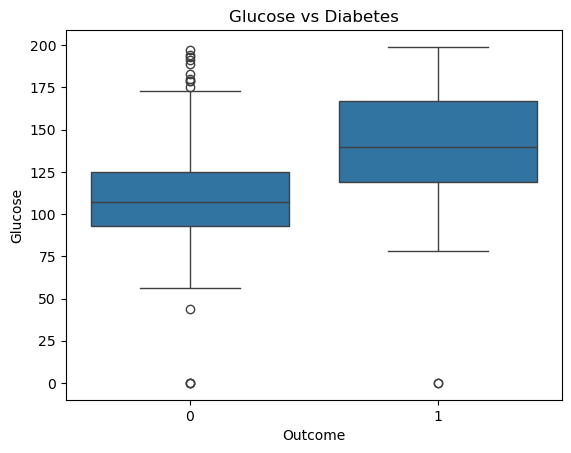

In [243]:
#Glucose and Diabetes
sns.boxplot(x="Outcome", y="Glucose",data=df).set_title("Glucose vs Diabetes")

Glucose level plays a major role in determine whether the patient is diabetic or not. The patients with median gluocse level less than 120<br> are more likely to be non-diabetic. The patients with median gluocse level greather than 140 are more likely to be diabetic. Therefore, high<br> gluocose levels is a good indicator of diabetes.

### __BLOOD PRESSURE AND DIABETES__

Text(0.5, 1.0, 'BloodPressure vs Diabetes')

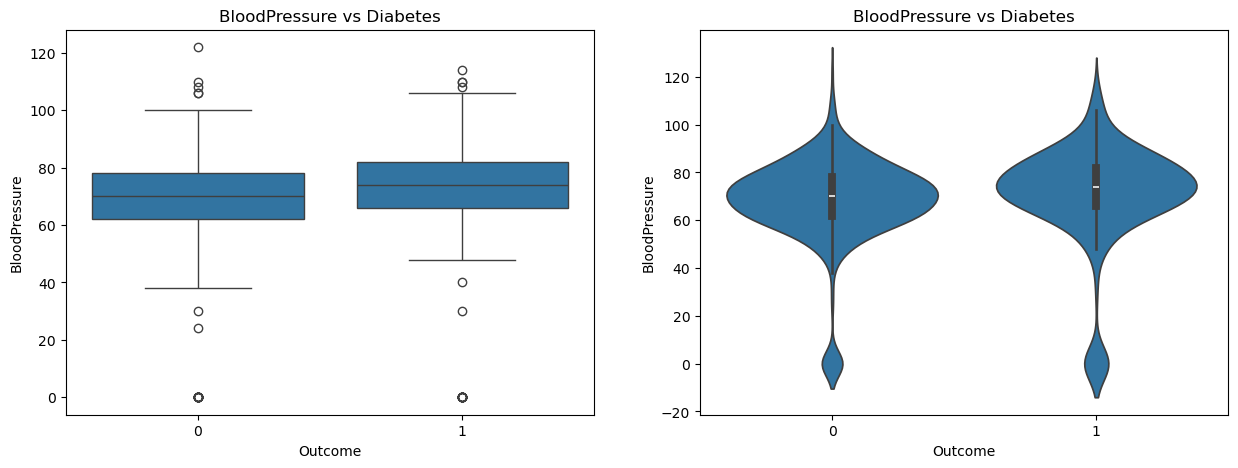

In [247]:
#Blood Pressure and Diabetes
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Outcome', y='BloodPressure',data=df, ax=ax[0]).set_title("BloodPressure vs Diabetes")
sns.violinplot(x='Outcome', y='BloodPressure',data=df, ax=ax[1]).set_title("BloodPressure vs Diabetes")

Both the boxplot and voilinplot provides clear understanding of the realtion between the blood pressure and diabetes. The boxplot shows<br> that the median of the blood pressure for the diabetic patients is slightly higher than the non-diabetic patients. The voilinplot shows that<br> the distribution of the blood pressure for the diabetic patients is slightly higher than the non-diabetic patients. But there has been not<br> enough evidence to conclude that the blood pressure is a good predictor of diabetes.

### __SKIN THICKNESS AND DIABETES__

Text(0.5, 1.0, 'SkinThickness vs Diabetes')

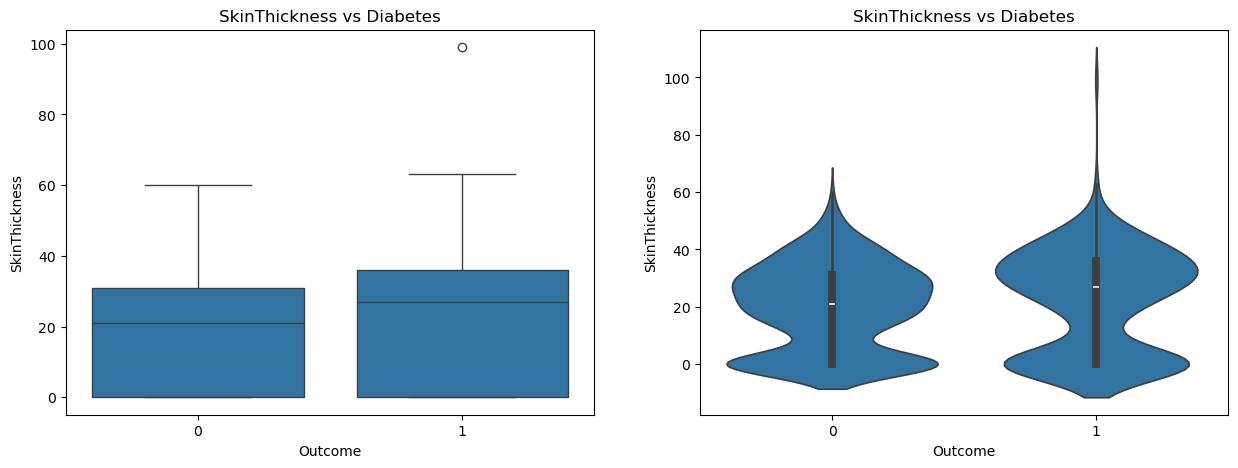

In [249]:
#skin thickness vs diabetes
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x="Outcome", y="SkinThickness" , data=df, ax=ax[0]).set_title("SkinThickness vs Diabetes")
sns.violinplot(x="Outcome", y="SkinThickness" , data=df, ax=ax[1]).set_title("SkinThickness vs Diabetes")

Here both the boxplot and violinplot reveals the effect of diabetes on skin thickness. As obserevd in the boxplot, the median of skin<br> thickness is higher for the diabetic patients than the non-diabetic patients, where non diabetic patients have median skin thickness near<br> 20 in comparison to skin thickness nearly 30 in diabetic patients. The voilinpplot shows the distribution of patients' skin thickness among<br> the patients, where the non diabetic ones have greater distribution near 20 and diabetic much less distribution near 20 and increased<br> distribution near 30. Therefore, skin thickness can be a indicator of diabetes.

### __INSULIN AND DIABETES__

Text(0.5, 1.0, 'Insulin vs Diabetes')

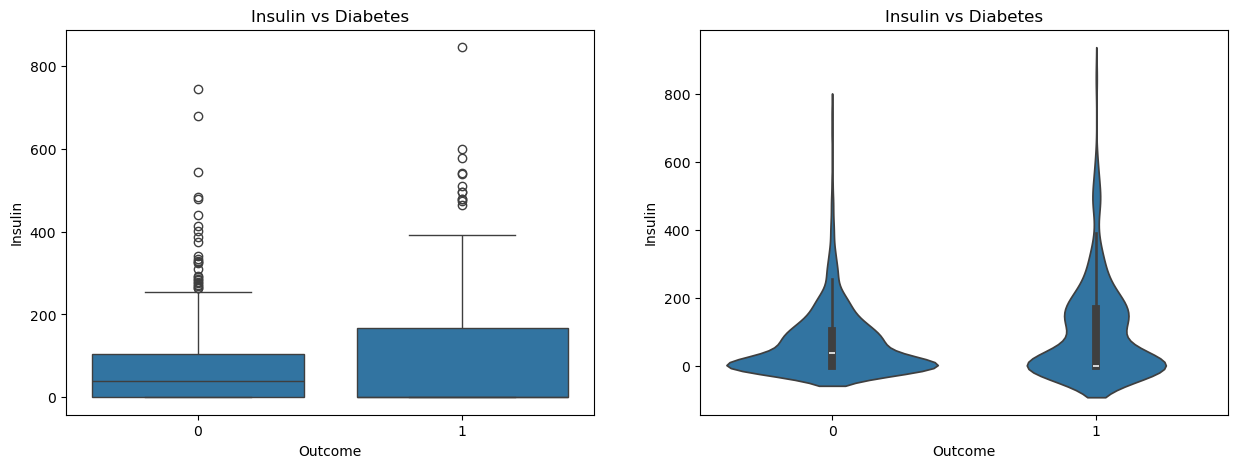

In [251]:
#Insulin vs Diabetes
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x="Outcome",y="Insulin",data=df,ax=ax[0]).set_title("Insulin vs Diabetes")
sns.violinplot(x="Outcome",y="Insulin",data=df,ax=ax[1]).set_title("Insulin vs Diabetes")

Insulin is a major body hormone that regulates glucose metabolism. Insulin is required for the body to efficiently use sugars, fats and proteins.<br> Any change in insulin amount in the body would result in change glucose levels as well. Here the boxplot and violinplot shows the distribution<br> of insulin level in patients. In non diabetic patients the insulin level is near to 100, whereas in diabetic patients the insulin level is near to 200.<br> In the voilinplot we can see that the distribution of insulin level in non diabetic patients is more spread out near 100, whereas in diabetic patients<br> the distribution is contracted and shows a little bit spread in higher insulin levels. This shows that the insulin level is a good indicator<br> of diabetes

### __BMI AND DIABETES__

Text(0.5, 1.0, 'BMI vs Diabetes')

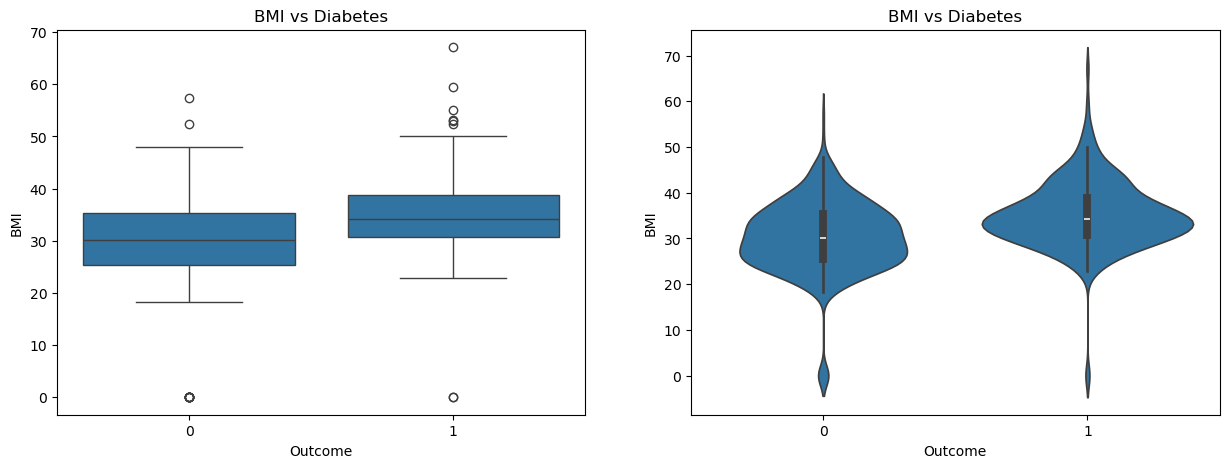

In [450]:
#BMI and Diabetes
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x="Outcome",y="BMI",data=df,ax=ax[0]).set_title("BMI vs Diabetes")
sns.violinplot(x="Outcome",y="BMI",data=df,ax=ax[1]).set_title("BMI vs Diabetes")

Both graphs highlights the role of BMI in diabetes prediction. Non diabetic patients have a normal BMI within the range of 25-35 whereas<br> the diabetic patients have a BMI greater than 35. The violinplot reveals the BMI distribution, where the non dibetic patients have a<br> increased spread from 25 to 35 with narrows after 35. However in diabetic patients there is increased spread at 35 and increased<br> spread 45-50 as compared to non diabetic patients.Therefore BMI is a good predictor of diabetes and obese people are more likely<br> to be diabetic

### __DIABETES PEDIGREE FUNCTION AND DIABETES OUTCOME__

Text(0.5, 1.0, 'DiabetesPedigreeFunction vs Diabetes')

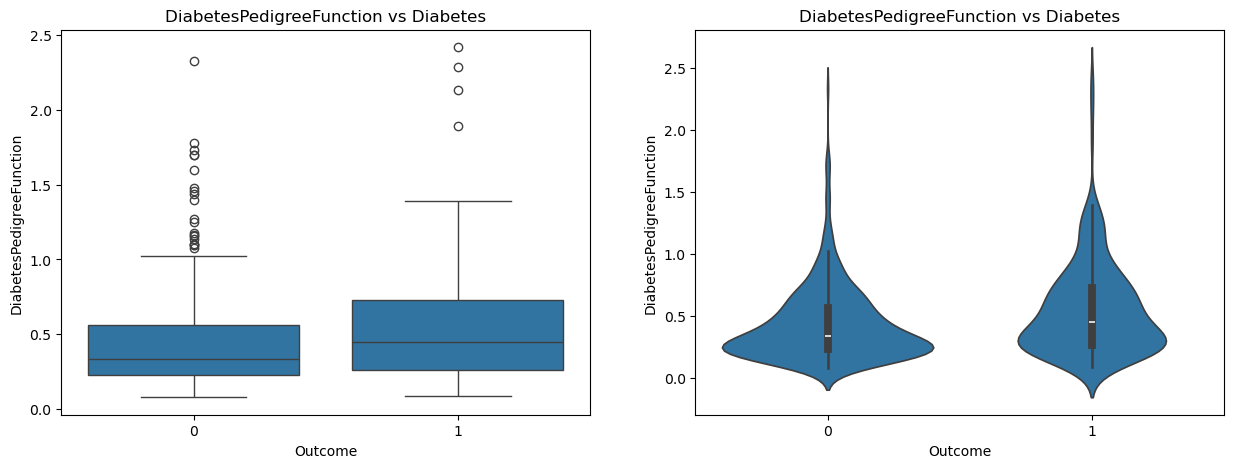

In [255]:
#Diabetes Pedigree Function vs Diabetes
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x="Outcome",y="DiabetesPedigreeFunction",data=df,ax=ax[0]).set_title("DiabetesPedigreeFunction vs Diabetes")
sns.violinplot(x="Outcome",y="DiabetesPedigreeFunction",data=df,ax=ax[1]).set_title("DiabetesPedigreeFunction vs Diabetes")

#Diabetes Pedigree Function (DPF) calculates diabetes likelihood depending on the subject's age and his/her diabetic family history. From<br> the boxplot, the patients with lower DPF, are much less likely to have diabetes. The patients with higher DPF, are much more likely to have<br> diabetes. In the violinplot, majority of the non diabetic patients have a DPF of 0.25-0.35, whereas the diabetic patients have a increased<br> DPF, which is shown by the their distribution in the violinplot where there is a increased spread in the DPF from 0.5 -1.5. Therefore the DPF<br> is a good indicator of diabetes

### __CORELATION MATRIX HEATMAP__

Text(0.5, 1.0, 'Corelation Heatmap')

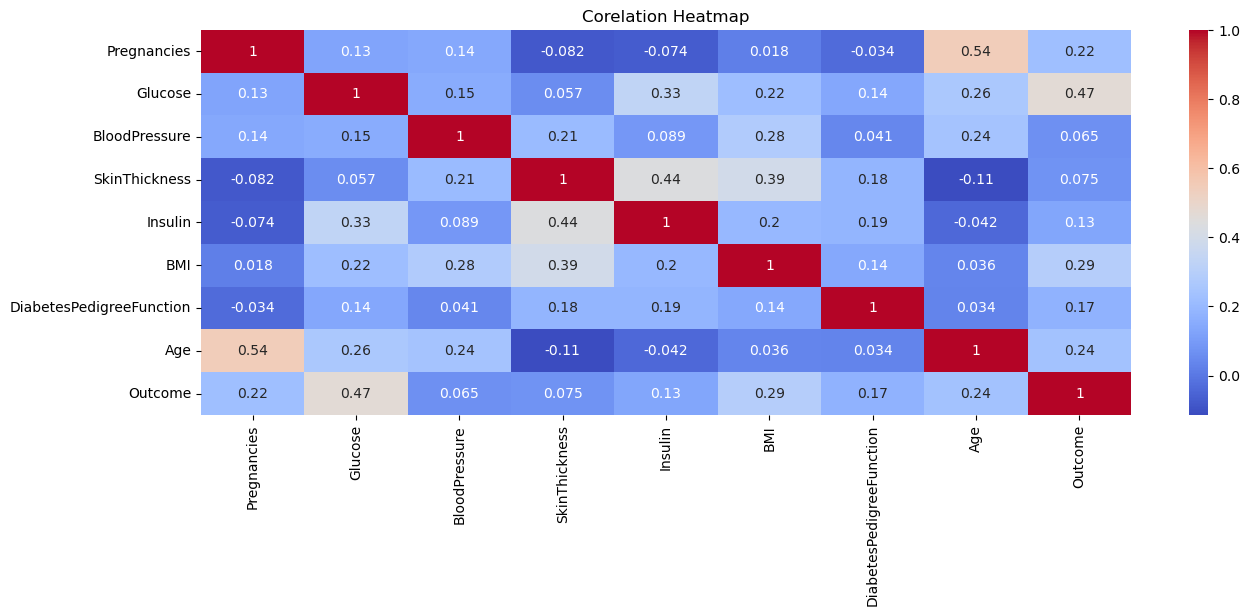

In [257]:
#Corelation Matrix Heatmap
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm").set_title("Corelation Heatmap")

### __TRAIN TEST SPLIT__

In [259]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df.drop("Outcome",axis=1),df['Outcome'],test_size=0.2,random_state=42)

### __DIABETES PREDICTION__

For predictiong the diabetes, I will be using the following algorithms:

1.Logistic Regression<br>
2.Random Forest Classifier<br>
3.Support Vector Machine

#### __LOGESTIC REGRESSION__

In [261]:
#LOGESTIC REGRESSION
#building model
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr

LogisticRegression()

In [503]:
#training the model
lr.fit(X_train,Y_train)
#training accuracy
lr.score(X_train,Y_train)

D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7719869706840391

In [265]:
#predicted outcomes
lr_pred = lr.predict(X_test)

#### __RANDOM FOREST CLASSIFIER__

In [267]:
#RANDOM FOREST CLASSIFIER
#building model
rfc=RandomForestClassifier(n_estimators=100,random_state=42)
rfc

RandomForestClassifier(random_state=42)

In [269]:
#training model
rfc.fit(X_train,Y_train)
#training accuracy
rfc.score(X_train,Y_train)

1.0

In [370]:
#predicted outcome
rfc_pred=rfc.predict(X_test)

#### __SUPPORT VECTOR MACHINE(SVM)__

In [273]:
#SUPPORT VECTOR MACHINE(SVM)
#building model
from sklearn.svm import SVC
svm=SVC(kernel="linear",random_state=0)
svm

SVC(kernel='linear', random_state=0)

In [275]:
#training the model
svm.fit(X_train,Y_train)
svm.score(X_train,Y_train)

0.7736156351791531

In [352]:
#presicting the outcomes
svm_pred=svm.predict(X_test)

### __MODEL EVALUATION__

#### __Evaluating Logistic Regression Model__

#### __Confusion Matrix Heatmap__

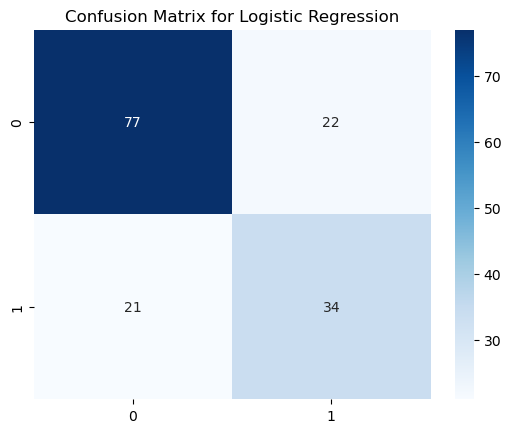

In [467]:
#MODEL EVALUATION
sns.heatmap(confusion_matrix(Y_test, rfc_pred), annot=True, cmap='Blues')
#plt.xlabel('Predicted Values')
#plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

The diagonal boxes shows the count of true positives for each class. The predicted value is given on<br> top while the actual value is given on the left side. The off-diagonal boxes shows the count of false positives.

C:\Users\OS\AppData\Local\Temp\ipykernel_8860\1339401971.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(Y_test,color="r",label="Actual Valuse",hist=False)
C:\Users\OS\AppData\Local\Temp\ipykernel_8860\1339401971.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lr_pre

Text(0.5, 1.0, 'Actual vs Predicted Value Logistic Regression')

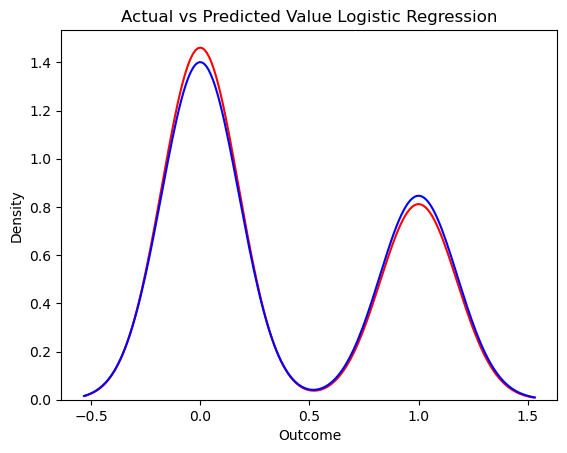

In [362]:
#Distribution Plot
ax=sns.distplot(Y_test,color="r",label="Actual Valuse",hist=False)
sns.distplot(lr_pred, color='b', label='Predicted Value',hist=False,ax=ax)
plt.title('Actual vs Predicted Value Logistic Regression')

These distribution plot clearly visualizes the accuracy of the model. The red color represents the actual values and the blue color<br> represents the predicted values. The more the overlapping of the two colors, the more accurate the model is.

### __CLASSIFICATION REPORT__

In [287]:
#CLASSIFICATION REPORT
from sklearn.metrics import classification_report
print(classification_report(Y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



The model has as an average f1 score of 0.755 and acuuracy of 78%

In [481]:
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score
print ("Accuracy Score: ",accuracy_score(Y_test,lr_pred))
print ("Mean Absolute Error: ",mean_absolute_error(Y_test,lr_pred))
print ("Mean Squared Error: ",mean_squared_error(Y_test,lr_pred))
print('R2 Score: ',r2_score(Y_test,lr_pred))

Accuracy Score:  0.7467532467532467
Mean Absolute Error:  0.2532467532467532
Mean Squared Error:  0.2532467532467532
R2 Score:  -0.10303030303030325


### __EVALUATING RANDOM FOREST CLASSIFIER__

__CONFUSION MATRIX HEATMAP__

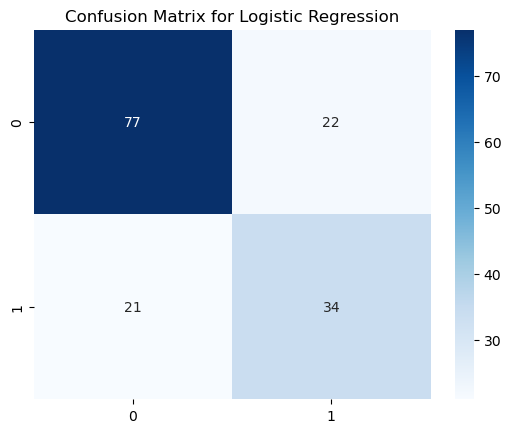

In [291]:
#EVALUATING Random Forest Classifier
#Confusion Matrix Heatmap
sns.heatmap(confusion_matrix(Y_test, rfc_pred), annot=True, cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

The diagonal boxes shows the count of true positives for each class. The predicted value is given on<br> top while the actual value is given on the left side. The off-diagonal boxes shows the count of false positives.

__DISTRIBUTION PLOT__

C:\Users\OS\AppData\Local\Temp\ipykernel_8860\2976366856.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(Y_test, color='r',  label='Actual Value',hist=False)
C:\Users\OS\AppData\Local\Temp\ipykernel_8860\2976366856.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rf

Text(0.5, 1.0, 'Actual vs Predicted Value Logistic Regression')

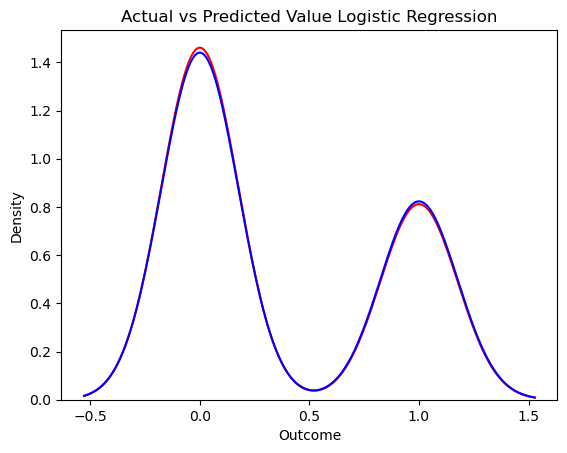

In [293]:
#DISTRIBUTION PLOT
ax = sns.distplot(Y_test, color='r',  label='Actual Value',hist=False)
sns.distplot(rfc_pred, color='b', label='Predicted Value',hist=False,ax=ax)
plt.title('Actual vs Predicted Value Logistic Regression')

These distribution plot clearly visualizes the accuracy of the model. The red color represents the actual values and the blue color<br> represents the predicted values. The more the overlapping of the two colors, the more accurate the model is.

__CLASSIFICATION REPORT__

In [181]:
#CLASSIFICATION REPORT
print(classification_report(Y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



The model has as an average f1 score of 0.745 and acuuracy of 77% which less in comparison to Logistic Regression model.

In [185]:
print('Accuracy Score: ',accuracy_score(Y_test,rfc_pred))
print('Mean Absolute Error: ',mean_absolute_error(Y_test,rfc_pred))
print('Mean Squared Error: ',mean_squared_error(Y_test,rfc_pred))
print('R2 Score: ',r2_score(Y_test,rfc_pred))

Accuracy Score:  0.7207792207792207
Mean Absolute Error:  0.2792207792207792
Mean Squared Error:  0.2792207792207792
R2 Score:  -0.21616161616161644


### __EVALUATING SVM MODEL__

__CONFUSION MATRIX HEATMAP__

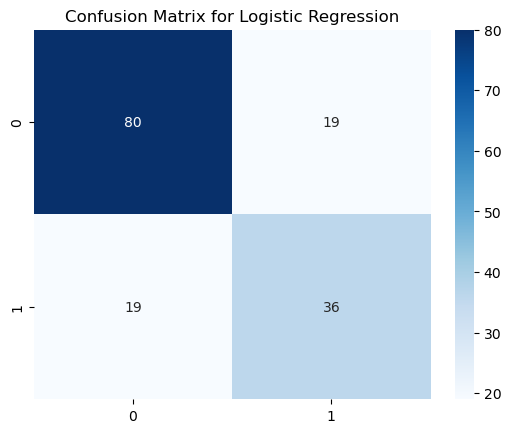

In [295]:
#EVALUATING SVM MODEL
#confusion Matrix heatmap
sns.heatmap(confusion_matrix(Y_test,svm_pred), annot=True,cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

The diagonal boxes shows the count of true positives for each class. The predicted value is given on top while the actual value is given on<br> the left side. The off-diagonal boxes shows the count of false positives.

__DISTRIBUTED PLOT__

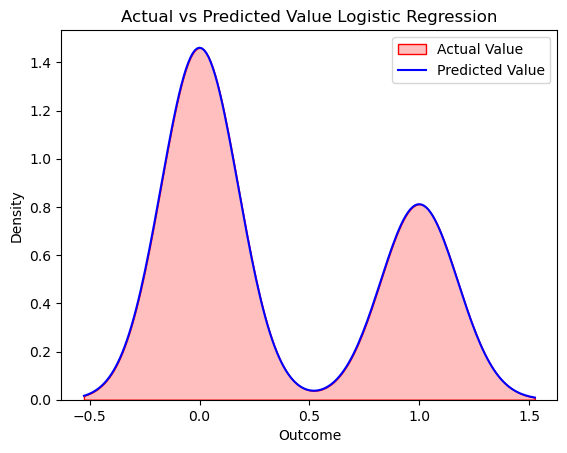

In [368]:
#DISTRIBUTED PLOT
ax = sns.kdeplot(Y_test, color='r', label='Actual Value', fill=True)
sns.kdeplot(svm_pred, color='b', label='Predicted Value', fill=False, ax=ax)

# Add title and labels
plt.title('Actual vs Predicted Value Logistic Regression')
plt.legend()
plt.show()

These distribution plot clearly visualizes the accuracy of the model. The red color represents the actual values and the blue color<br> represents the predicted values. The more the overlapping of the two colors, the more accurate the model is.

### __CLASSIFICATION REPORT__

In [317]:
#CLASSIFICATION REPORT
print(classification_report(Y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



The model has as an average f1 score of 0.745 and acuuracy of 77% which is equivalent to previous model.

In [319]:
print('Accuracy Score: ',accuracy_score(Y_test,svm_pred))
print('Mean Absolute Error: ',mean_absolute_error(Y_test,svm_pred))
print('Mean Squared Error: ',mean_squared_error(Y_test,svm_pred))
print('R2 Score: ',r2_score(Y_test,svm_pred))

Accuracy Score:  0.7532467532467533
Mean Absolute Error:  0.24675324675324675
Mean Squared Error:  0.24675324675324675
R2 Score:  -0.074747474747475


### __COMPARING THE MODELS__

C:\Users\OS\AppData\Local\Temp\ipykernel_8860\3832786830.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette=colors)


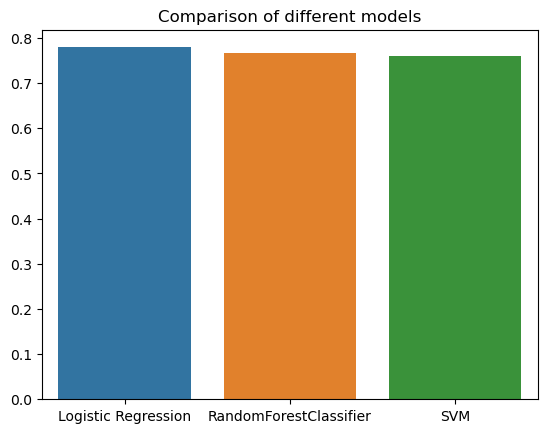

In [331]:
#COMPARING THE MODELS
# Data for the models and their accuracies
models = ['Logistic Regression', 'RandomForestClassifier', 'SVM']
accuracies = [0.7792207792207793, 0.7662337662337663, 0.7597402597402597]

# Define the colors you want to use for each bar
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Example colors

# Create the barplot with the specified colors
sns.barplot(x=models, y=accuracies, palette=colors)

# Add labels and title
plt.title('Comparison of different models')

# Show the plot
plt.show()


## __Conclusion__

From the exploratory data analysis, I have concluded that the risk of diabetes depends upon the following factors:<br>
1.Glucose level<br>
2.Number of pregnancies<br>
3.Skin Thickness<br>
4.Insulin level<br>
5.BMI<br>

With in increase in Glucose level, insulin level, BMI and number of pregnancies, the risk of diabetes increases. However, the number of<br> pregnancies have strange effect of risk of diabetes which couldn't be explained by the data. The risk of diabetes also increases with<br> increase in skin thickness.

Coming to the classification models, Logistic Regression outperformed Random Forest and SVM with 78% accuracy. The accuracy of the<br> model can be improved by increasing the size of the dataset. The dataset used for this project was very small and had only 768 rows.